# [선형회귀모델 실습: 하이닉스 데이터]

## 1. 모듈 불러오기

#### import 불러올 패키지명 as 그패키지를 파이썬에서 사용할 이름

In [1]:
# 데이터 전처리 패키지
import pandas as pd
import numpy as np

# 선형회귀 모델 구축 및 평가 패키지
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 시각화 패키지
import matplotlib.pyplot as plt

## 2. 데이터 불러오기: 하이닉스 FDC 데이터

#### X 데이터(입력변수) 불러오기

+ 관측치 개수: 508,206개
+ 변수 개수: 24개
    + TIME: 관측 시간
    + EQP 2: 장비
    + MODULE 2: 모듈
    + LOT_ID 2: LOT ID
    + TIME_PROCESS: LOT별 관측 번호
    + Para 01~19: 관측값

In [2]:
x_data = pd.read_csv('C:/Users/Baek/Downloads/FD2_Analysis.L_XDATA.csv')
print(x_data.columns)

Index(['TIME', 'EQP 2', 'MODULE 2', 'LOT_ID 2', 'TIME_PROCESS', 'Para 01',
       'Para 02', 'Para 03', 'Para 04', 'Para 05', 'Para 06', 'Para 07',
       'Para 08', 'Para 09', 'Para 10', 'Para 11', 'Para 12', 'Para 13',
       'Para 14', 'Para 15', 'Para 16', 'Para 17', 'Para 18', 'Para 19'],
      dtype='object')


In [3]:
x_data.shape

(508206, 24)

In [4]:
x_data

,TIME,EQP 2,MODULE 2,LOT_ID 2,TIME_PROCESS,Para 01,Para 02,Para 03,Para 04,Para 05,...,Para 10,Para 11,Para 12,Para 13,Para 14,Para 15,Para 16,Para 17,Para 18,Para 19
0,14:17.9,C,D,ABCAC29,1,-0.139785,-0.753355,-1.024975,-1.505540,-0.237628,...,1.884452,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.743457,-1.029292,-2.853902,2.222534
1,14:18.9,C,D,ABCAC29,2,-0.139785,-0.753355,-1.024975,-1.408907,-0.219155,...,1.884452,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.743457,-1.029292,-2.853902,2.222534
2,14:19.9,C,D,ABCAC29,3,-0.139785,0.173656,-1.024975,-1.289265,-0.237628,...,2.137315,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.648641,-1.029292,-2.853902,2.335617
3,14:20.9,C,D,ABCAC29,4,-0.139785,0.173656,-1.024975,-1.169624,-0.219155,...,1.884452,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.553824,-1.006165,-2.853902,2.222534
4,14:21.9,C,D,ABCAC29,5,-0.139785,0.173656,-1.024975,-0.999365,-0.237628,...,2.137315,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.364192,-1.006165,-2.853902,2.222534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508201,21:39.3,B,C,ABCAM73,596,0.211300,0.173656,-1.024975,-0.309126,0.076406,...,0.114413,-1.159996,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851
508202,21:40.2,B,C,ABCAM73,597,0.211300,0.173656,-1.024975,-0.318330,0.076406,...,0.114413,-0.956744,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851
508203,21:41.4,B,C,ABCAM73,598,0.211300,0.173656,-1.024975,-0.322931,0.076406,...,0.367276,-0.956744,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851
508204,21:42.4,B,C,ABCAM73,599,0.035757,0.173656,1.102850,-0.327533,0.057933,...,0.367276,-0.956744,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851


#### Y data(출력변수) 불러오기

+ 관측치 개수: 35,178개
+ 변수 개수: 6개
    + LOT_ID 2: LOT ID
    + WF_ID: Wafer ID
    + Site: Wafer 내 관측 위치
    + X axis: Wafer 내 관측 X 좌표
    + Y axis: Wafer 내 관측 Y 좌표
    + Response: 반응률(예측하고자 하는 반응 변수)

In [5]:
y_data = pd.read_csv('C:/Users/Baek/Downloads/FD2_Analysis.L_YDATA.csv')
print(y_data.columns)

Index(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis', 'Response'], dtype='object')


In [6]:
y_data.shape

(35178, 6)

In [7]:
y_data

,LOT_ID 2,WF_ID,Site,X axis,Y axis,Response
0,ABCA764,3,7,-55,48,-0.198842
1,ABCA764,3,8,-55,-17,-0.006703
2,ABCA764,3,11,-100,81,-0.115168
3,ABCA764,3,3,-10,15,-0.000505
4,ABCA764,3,1,-122,15,0.442652
...,...,...,...,...,...,...
35173,ABC9321,3,6,35,48,-0.394079
35174,ABC9321,3,13,80,-50,-0.394079
35175,ABC9321,3,9,35,-17,-0.434366
35176,ABC9321,3,10,80,81,-0.431267


## 3. 데이터 전처리

#### 데이터 내에 결측치 파악

In [8]:
x_data.isnull().sum()

TIME            0
EQP 2           0
MODULE 2        0
LOT_ID 2        0
TIME_PROCESS    0
Para 01         0
Para 02         0
Para 03         0
Para 04         0
Para 05         0
Para 06         0
Para 07         0
Para 08         0
Para 09         0
Para 10         0
Para 11         0
Para 12         0
Para 13         0
Para 14         0
Para 15         0
Para 16         0
Para 17         0
Para 18         0
Para 19         0
dtype: int64

In [9]:
y_data.isnull().sum()

LOT_ID 2     0
WF_ID        0
Site         0
X axis       0
Y axis       0
Response    14
dtype: int64

#### 결측치가 존재하는 관측치 제거

In [10]:
y_data = y_data.dropna()

In [11]:
y_data.shape

(35164, 6)

#### 범주형 변수, 수치형 변수 분리

+ X 데이터(입력 변수): 24개
+ Key 변수: 1개
    + LOT_ID 2
+ 범주형 변수: 2개
    + EQP 2, MODULE 2
+ 수치형 변수: 19개
    + Para01~19
+ 사용하지 않는 변수: 2개
    + TIME, TIME_PROCESS

In [12]:
# 범주형 변수 & Key 변수 분리
data_categorical = x_data[['EQP 2', 'MODULE 2', 'LOT_ID 2']]

In [13]:
# 범주형 변수 중복값 제거
data_categorical = data_categorical.drop_duplicates()
data_categorical = data_categorical.reset_index(drop=True)

In [14]:
# Key 변수 분리
lot_id = data_categorical['LOT_ID 2']

In [15]:
# 범주형 변수 분리
data_categorical = data_categorical.drop(['LOT_ID 2'], axis=1)

In [16]:
# 범주형 변수 one-hot-encoding
data_categorical = pd.get_dummies(data_categorical, drop_first=True)

In [17]:
# 범주형 변수, Key 변수 결합
data_categorical =  pd.concat([lot_id, data_categorical], axis=1)

In [18]:
data_categorical

,LOT_ID 2,EQP 2_B,EQP 2_C,MODULE 2_B,MODULE 2_C,MODULE 2_D
0,ABCAC29,0,1,0,0,1
1,ABCAC78,0,1,0,0,1
2,ABCAD27,0,1,0,0,1
3,ABCA949,0,1,0,0,1
4,ABCAA39,0,1,0,0,1
...,...,...,...,...,...,...
841,ABCAJ85,1,0,0,1,0
842,ABCAJ99,1,0,0,1,0
843,ABCAK03,1,0,0,1,0
844,ABCAK47,1,0,0,1,0


In [19]:
# 수치형 변수 분리
x_data_num = x_data.drop(['TIME','EQP 2', 'MODULE 2','TIME_PROCESS'], axis=1)

In [20]:
x_data_num

,LOT_ID 2,Para 01,Para 02,Para 03,Para 04,Para 05,Para 06,Para 07,Para 08,Para 09,Para 10,Para 11,Para 12,Para 13,Para 14,Para 15,Para 16,Para 17,Para 18,Para 19
0,ABCAC29,-0.139785,-0.753355,-1.024975,-1.505540,-0.237628,-0.134672,1.791254,1.111967,1.359035,1.884452,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.743457,-1.029292,-2.853902,2.222534
1,ABCAC29,-0.139785,-0.753355,-1.024975,-1.408907,-0.219155,-0.134672,2.415552,1.111967,1.359035,1.884452,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.743457,-1.029292,-2.853902,2.222534
2,ABCAC29,-0.139785,0.173656,-1.024975,-1.289265,-0.237628,-0.134672,0.542658,1.111967,1.359035,2.137315,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.648641,-1.029292,-2.853902,2.335617
3,ABCAC29,-0.139785,0.173656,-1.024975,-1.169624,-0.219155,0.975136,1.791254,1.111967,1.359035,1.884452,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.553824,-1.006165,-2.853902,2.222534
4,ABCAC29,-0.139785,0.173656,-1.024975,-0.999365,-0.237628,-0.134672,0.542658,1.111967,0.755216,2.137315,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.364192,-1.006165,-2.853902,2.222534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508201,ABCAM73,0.211300,0.173656,-1.024975,-0.309126,0.076406,-0.504608,0.542658,-0.710376,-1.358148,0.114413,-1.159996,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851
508202,ABCAM73,0.211300,0.173656,-1.024975,-0.318330,0.076406,-1.244481,0.542658,-0.710376,-1.358148,0.114413,-0.956744,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851
508203,ABCAM73,0.211300,0.173656,-1.024975,-0.322931,0.076406,-1.244481,0.542658,-1.317824,-1.056239,0.367276,-0.956744,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851
508204,ABCAM73,0.035757,0.173656,1.102850,-0.327533,0.057933,-0.504608,0.542658,-1.317824,-1.056239,0.367276,-0.956744,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851


#### LOT_ID별 mean, max, min, variance, median, sum 값 요약

In [21]:
# mean값 요약
mean_data = x_data_num.groupby(x_data_num['LOT_ID 2']).mean()
mean_data.rename(columns = lambda x: x.replace('Para', 'mean'), inplace=True)

In [22]:
# max값 요약
max_data = x_data_num.groupby(x_data_num['LOT_ID 2']).max()
max_data.rename(columns = lambda x: x.replace('Para', 'max'), inplace=True)

In [23]:
# min값 요약
min_data = x_data_num.groupby(x_data_num['LOT_ID 2']).min() 
min_data.rename(columns = lambda x: x.replace('Para', 'min'), inplace=True)

In [24]:
# variance값 요약
var_data = x_data_num.groupby(x_data_num['LOT_ID 2']).var()
var_data.rename(columns = lambda x: x.replace('Para', 'var'), inplace=True)

In [25]:
# median값 요약
median_data = x_data_num.groupby(x_data_num['LOT_ID 2']).median()
median_data.rename(columns = lambda x: x.replace('Para', 'median'), inplace=True)

In [26]:
# sum값 요약
sum_data = x_data_num.groupby(x_data_num['LOT_ID 2']).sum()
sum_data.rename(columns = lambda x: x.replace('Para', 'sum'), inplace=True)

#### 분석 데이터 Set 구축
+ LOT_ID 기준으로 X, Y 데이터 병합
+ 최종 데이터
    + 관측치 개수: 35,164개
    + 입력변수: 119개
    + 출력변수: 1개(Response)

In [27]:
# LOT_ID별 요약 데이터 결합(수치형 데이터)
full_data = y_data.merge(mean_data, on='LOT_ID 2').merge(max_data, on='LOT_ID 2').merge(min_data, on='LOT_ID 2').merge(var_data, on='LOT_ID 2').merge(median_data, on='LOT_ID 2').merge(sum_data, on='LOT_ID 2')

In [28]:
# 범주형 변수 데이터 결합
full_data = full_data.merge(data_categorical, on='LOT_ID 2')

In [29]:
full_data.columns

Index(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis', 'Response', 'mean 01',
       'mean 02', 'mean 03', 'mean 04',
       ...
       'sum 15', 'sum 16', 'sum 17', 'sum 18', 'sum 19', 'EQP 2_B', 'EQP 2_C',
       'MODULE 2_B', 'MODULE 2_C', 'MODULE 2_D'],
      dtype='object', length=125)

In [30]:
full_data

,LOT_ID 2,WF_ID,Site,X axis,Y axis,Response,mean 01,mean 02,mean 03,mean 04,...,sum 15,sum 16,sum 17,sum 18,sum 19,EQP 2_B,EQP 2_C,MODULE 2_B,MODULE 2_C,MODULE 2_D
0,ABCA764,3,7,-55,48,-0.198842,0.310317,-0.027634,-0.042412,-0.552697,...,3.437219,79.783517,-721.981753,179.837862,229.007216,1,0,1,0,0
1,ABCA764,3,8,-55,-17,-0.006703,0.310317,-0.027634,-0.042412,-0.552697,...,3.437219,79.783517,-721.981753,179.837862,229.007216,1,0,1,0,0
2,ABCA764,3,11,-100,81,-0.115168,0.310317,-0.027634,-0.042412,-0.552697,...,3.437219,79.783517,-721.981753,179.837862,229.007216,1,0,1,0,0
3,ABCA764,3,3,-10,15,-0.000505,0.310317,-0.027634,-0.042412,-0.552697,...,3.437219,79.783517,-721.981753,179.837862,229.007216,1,0,1,0,0
4,ABCA764,3,1,-122,15,0.442652,0.310317,-0.027634,-0.042412,-0.552697,...,3.437219,79.783517,-721.981753,179.837862,229.007216,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35159,ABC9567,3,6,35,48,-0.759761,0.758667,-0.044600,-0.056858,1.445626,...,-32.451420,-218.129567,170.878768,197.539321,290.071628,0,0,0,0,0
35160,ABC9567,3,13,80,-50,-0.465356,0.758667,-0.044600,-0.056858,1.445626,...,-32.451420,-218.129567,170.878768,197.539321,290.071628,0,0,0,0,0
35161,ABC9567,3,9,35,-17,-0.434366,0.758667,-0.044600,-0.056858,1.445626,...,-32.451420,-218.129567,170.878768,197.539321,290.071628,0,0,0,0,0
35162,ABC9567,3,10,80,81,-0.400277,0.758667,-0.044600,-0.056858,1.445626,...,-32.451420,-218.129567,170.878768,197.539321,290.071628,0,0,0,0,0


In [31]:
# X & Y 데이터 SET 구축
data_x = full_data.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis', 'Response'], axis=1)
data_y = full_data['Response']

In [32]:
data_x

,mean 01,mean 02,mean 03,mean 04,mean 05,mean 06,mean 07,mean 08,mean 09,mean 10,...,sum 15,sum 16,sum 17,sum 18,sum 19,EQP 2_B,EQP 2_C,MODULE 2_B,MODULE 2_C,MODULE 2_D
0,0.310317,-0.027634,-0.042412,-0.552697,-0.520095,0.353447,-0.511689,0.991691,-0.962300,-0.290335,...,3.437219,79.783517,-721.981753,179.837862,229.007216,1,0,1,0,0
1,0.310317,-0.027634,-0.042412,-0.552697,-0.520095,0.353447,-0.511689,0.991691,-0.962300,-0.290335,...,3.437219,79.783517,-721.981753,179.837862,229.007216,1,0,1,0,0
2,0.310317,-0.027634,-0.042412,-0.552697,-0.520095,0.353447,-0.511689,0.991691,-0.962300,-0.290335,...,3.437219,79.783517,-721.981753,179.837862,229.007216,1,0,1,0,0
3,0.310317,-0.027634,-0.042412,-0.552697,-0.520095,0.353447,-0.511689,0.991691,-0.962300,-0.290335,...,3.437219,79.783517,-721.981753,179.837862,229.007216,1,0,1,0,0
4,0.310317,-0.027634,-0.042412,-0.552697,-0.520095,0.353447,-0.511689,0.991691,-0.962300,-0.290335,...,3.437219,79.783517,-721.981753,179.837862,229.007216,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35159,0.758667,-0.044600,-0.056858,1.445626,-0.871165,-0.129132,0.238300,-1.117700,1.348486,-0.938270,...,-32.451420,-218.129567,170.878768,197.539321,290.071628,0,0,0,0,0
35160,0.758667,-0.044600,-0.056858,1.445626,-0.871165,-0.129132,0.238300,-1.117700,1.348486,-0.938270,...,-32.451420,-218.129567,170.878768,197.539321,290.071628,0,0,0,0,0
35161,0.758667,-0.044600,-0.056858,1.445626,-0.871165,-0.129132,0.238300,-1.117700,1.348486,-0.938270,...,-32.451420,-218.129567,170.878768,197.539321,290.071628,0,0,0,0,0
35162,0.758667,-0.044600,-0.056858,1.445626,-0.871165,-0.129132,0.238300,-1.117700,1.348486,-0.938270,...,-32.451420,-218.129567,170.878768,197.539321,290.071628,0,0,0,0,0


In [33]:
data_y

0       -0.198842
1       -0.006703
2       -0.115168
3       -0.000505
4        0.442652
           ...   
35159   -0.759761
35160   -0.465356
35161   -0.434366
35162   -0.400277
35163   -0.555227
Name: Response, Length: 35164, dtype: float64

## 4. 전체 데이터에 대한 모델링

#### 모델 구축을 위한 Train, Test 데이터 분리

In [34]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.3, random_state=2020)

#### 평균, 분산을 활용한 Column 별 정규화 진행

In [35]:
sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

### 전체 data에 대한 Linear 모델 구축
#### statsmodels 의 OLS를 사용하여 선형회귀분석 시행(OLS: Ordinary Least Squares)
+ 모델 선언: model = sm.OLS(Y데이터, X데이터)
+ 모델 학습: model_trained = model.fit()

In [36]:
model = sm.OLS(train_y, train_x_sc)

In [37]:
model_trained = model.fit()

## 5. 전체 데이터에 대한 모델 결과 해석

+ R-sqared (결정계수, coefficient of determination): 모형의 성능
+ coef (회귀계수): X가 한단위 증가할 때 Y의 변화량
+ P>[t] (p-value): 0.1(or 0.05)이하일 때 변수가 유의미

In [38]:
model_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     18.32
Date:                Sun, 02 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:36:47   Log-Likelihood:                -38580.
No. Observations:               24614   AIC:                         7.738e+04
Df Residuals:                   24504   BIC:                         7.827e+04
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -6.6630     56.878     -0.117      0.907    -118.147     104.821
x2           -12.1045     20.541     -0.589      0.556     -52.367      28.158
x3             2.2235     25.779      0.086      0.931     -48.306      52.753
x4           130.8573     31.504      4.154      0.000      69.108     192.606
x5           -16.5098     53.270     -0.310      0.757    -120.923      87.903
x6           -74.5450     30.209     -2.468      0.014    -133.756     -15.334
x7             2.4204     61.030      0.040      0.968    -117.203     122.044
x8           178.7708     67.112      2.664      0.008      47.228     310.314
x9            67.7917     40.103      1.690      0.091     -10.812     146.396
x10          151.3105     46.381      3.262      0.001      60.400     242.221
x11         -206.8925     78.987     -2.619      0.009    -361.712     -52.073
x12          -44.0805     44.410     -0.993      0.321    -131.127      42.966
x13           19.3164     14.345      1.347      0.178      -8.801      47.433
x14           19.3164     14.345      1.347      0.178      -8.801      47.433
x15           14.4526     17.017      0.849      0.396     -18.902      47.807
x16         -102.1137     37.849     -2.698      0.007    -176.299     -27.928
x17         -152.9619     45.727     -3.345      0.001    -242.590     -63.333
x18          117.9333     82.192      1.435      0.151     -43.168     279.035
x19           -3.8291     10.918     -0.351      0.726     -25.229      17.571
x20            0.1882      0.074      2.538      0.011       0.043       0.334
x21            0.0528      0.018      2.905      0.004       0.017       0.088
x22           -0.0184      0.009     -2.156      0.031      -0.035      -0.002
x23            0.6598      0.284      2.319      0.020       0.102       1.217
x24            0.6056      0.900      0.673      0.501      -1.158       2.369
x25           -0.0728      0.027     -2.694      0.007      -0.126      -0.020
x26           -0.0822      0.019     -4.388      0.000      -0.119      -0.045
x27            0.1916      0.040      4.779      0.000       0.113       0.270
x28            0.2314      0.041      5.639      0.000       0.151       0.312
x29           -0.0679      0.065     -1.046      0.295      -0.195       0.059
x30           -0.2576      0.061     -4.217      0.000      -0.377      -0.138
x31            0.2194      0.220      0.999      0.318      -0.211       0.650
x32           -0.0322      0.011     -2.906      0.004      -0.054      -0.010
x33           -0.0322      0.011     -2.906      0.004      -0.054      -0.010
x34            0.0130      0.024      0.548      0.583      -0.034       0.060
x35            0.1740      0.065      2.692      0.007       0.047       0.301
x36            0.6422      0.258      2.492      0.013       0.137       1.147
x3

## 6. 실제값 vs 모델 예측값 비교

#### Linear Model 예측값 출력

In [39]:
y_pred_tr = model_trained.predict(train_x_sc)
y_pred_ts = model_trained.predict(test_x_sc)

#### [TEST] 실제값과 모델 예측값에 대한 산점도

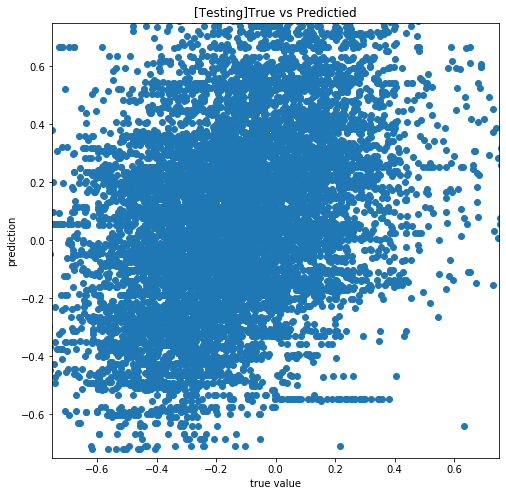

In [40]:
plt.figure(figsize=(8,8))
plt.title('[Testing]True vs Predictied')
plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts)
plt.show()

### 모델 예측값 평가를 위한 지표들(MSE, MAE, R-squared, MAPE)

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [42]:
print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts)))

Training MSE in Linear: 1.346
Testing MSE in Linear: 1.167


In [43]:
print('Training MAE in Linear: {:.3f}' .format(mean_absolute_error(train_y, y_pred_tr)))
print('Testing MAE in Linear: {:.3f}' .format(mean_absolute_error(test_y, y_pred_ts)))

Training MAE in Linear: 0.511
Testing MAE in Linear: 0.497


In [44]:
print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts)))

Training R2 in Linear: 0.075
Testing R2 in Linear: 0.065


#### 실제값에 '0'이 존재하는 경우에는 MAPE를 계산할 수 없음

In [45]:
print('Training MAPE in Linear: {:.3f}' .format(mean_absolute_percentage_error(train_y, y_pred_tr)))
print('Testing MAPE in Linear: {:.3f}' .format(mean_absolute_percentage_error(test_y, y_pred_ts)))

Training MAPE in Linear: inf
Testing MAPE in Linear: inf


C:\Users\Baek\Anaconda3\envs\is\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


## 7. Site(측정 위치 동일)별 선형 회귀 모델(Linear Regression) 구축

### Site=1인 데이터로 분석

#### 모델 구축을 위한 데이터 전처리

In [46]:
data_1 = full_data[full_data['Site'] == 1]

In [47]:
data_1 = data_1.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)

In [48]:
data_1_X = data_1.drop(['Response'], axis=1)
data_1_Y = data_1['Response']

#### 선형 회귀 모델 구축

In [49]:
train_x, test_x, train_y, test_y = train_test_split(data_1_X, data_1_Y, test_size=0.3, random_state=2020)

In [50]:
sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

In [51]:
model = sm.OLS(train_y, train_x_sc)
model_trained = model.fit()

In [52]:
y_pred_tr = model_trained.predict(train_x_sc)
y_pred_ts = model_trained.predict(test_x_sc)

#### 모델에 대한 성능 평가

In [53]:
print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts)))

print('Training MAE in Linear: {:.3f}' .format(mean_absolute_error(train_y, y_pred_tr)))
print('Testing MAE in Linear: {:.3f}' .format(mean_absolute_error(test_y, y_pred_ts)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts)))

Training MSE in Linear: 3.638
Testing MSE in Linear: 3.239
Training MAE in Linear: 1.214
Testing MAE in Linear: 1.181
Training R2 in Linear: 0.213
Testing R2 in Linear: 0.089


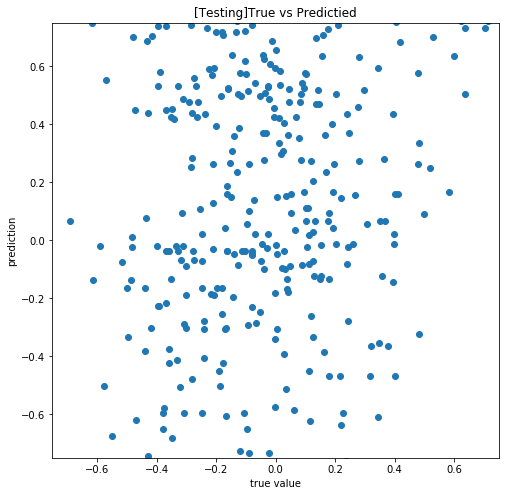

In [54]:
plt.figure(figsize=(8,8))
plt.title('[Testing]True vs Predictied')
plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts)

## Site=2일 때 결과 도출

Training MSE in Linear: 4.102
Testing MSE in Linear: 4.074
Training MAE in Linear: 1.303
Testing MAE in Linear: 1.322
Training R2 in Linear: 0.200
Testing R2 in Linear: 0.157


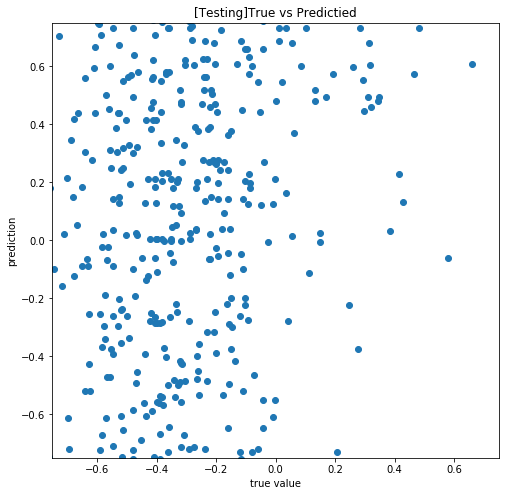

In [55]:
data_2 = full_data[full_data['Site'] == 2]
data_2 = data_2.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)

data_2_X = data_2.drop(['Response'], axis=1)
data_2_Y = data_2['Response']

train_x, test_x, train_y, test_y = train_test_split(data_2_X, data_2_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

model= sm.OLS(train_y, train_x_sc)
model_trained = model.fit()

y_pred_tr = model_trained.predict(train_x_sc)
y_pred_ts = model_trained.predict(test_x_sc)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts)))

print('Training MAE in Linear: {:.3f}' .format(mean_absolute_error(train_y, y_pred_tr)))
print('Testing MAE in Linear: {:.3f}' .format(mean_absolute_error(test_y, y_pred_ts)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts)))

plt.figure(figsize=(8,8))
plt.title('[Testing]True vs Predictied')
plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts)

## Site=3일 때 결과 도출

Training MSE in Linear: 0.055
Testing MSE in Linear: 0.044
Training MAE in Linear: 0.144
Testing MAE in Linear: 0.151
Training R2 in Linear: 0.420
Testing R2 in Linear: 0.389


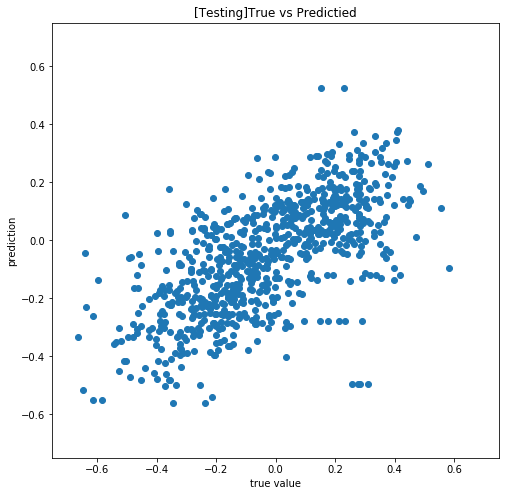

In [56]:
data_3 = full_data[full_data['Site'] == 3]
data_3 = data_3.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)

data_3_X = data_3.drop(['Response'], axis=1)
data_3_Y = data_3['Response']

train_x, test_x, train_y, test_y = train_test_split(data_3_X, data_3_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

model = sm.OLS(train_y, train_x_sc)
model_trained = model.fit()

y_pred_tr = model_trained.predict(train_x_sc)
y_pred_ts = model_trained.predict(test_x_sc)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts)))

print('Training MAE in Linear: {:.3f}' .format(mean_absolute_error(train_y, y_pred_tr)))
print('Testing MAE in Linear: {:.3f}' .format(mean_absolute_error(test_y, y_pred_ts)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts)))

plt.figure(figsize=(8,8))
plt.title('[Testing]True vs Predictied')
plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts)

## Site=4일 때 결과 도출

Training MSE in Linear: 0.149
Testing MSE in Linear: 0.190
Training MAE in Linear: 0.178
Testing MAE in Linear: 0.203
Training R2 in Linear: 0.175
Testing R2 in Linear: 0.042


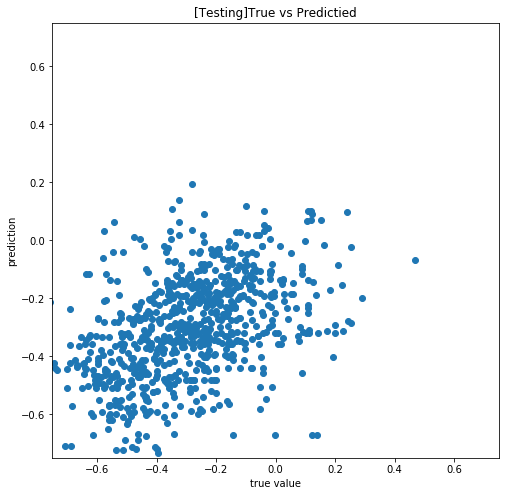

In [57]:
data_4 = full_data[full_data['Site'] == 4]
data_4 = data_4.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)

data_4_X = data_4.drop(['Response'], axis=1)
data_4_Y = data_4['Response']

train_x, test_x, train_y, test_y = train_test_split(data_4_X, data_4_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

model = sm.OLS(train_y, train_x_sc)
model_trained = model.fit()

y_pred_tr = model_trained.predict(train_x_sc)
y_pred_ts = model_trained.predict(test_x_sc)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts)))

print('Training MAE in Linear: {:.3f}' .format(mean_absolute_error(train_y, y_pred_tr)))
print('Testing MAE in Linear: {:.3f}' .format(mean_absolute_error(test_y, y_pred_ts)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts)))

plt.figure(figsize=(8,8))
plt.title('[Testing]True vs Predictied')
plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts)

## Site=5일 때 결과 도출

Training MSE in Linear: 0.057
Testing MSE in Linear: 0.063
Training MAE in Linear: 0.143
Testing MAE in Linear: 0.147
Training R2 in Linear: 0.353
Testing R2 in Linear: 0.293


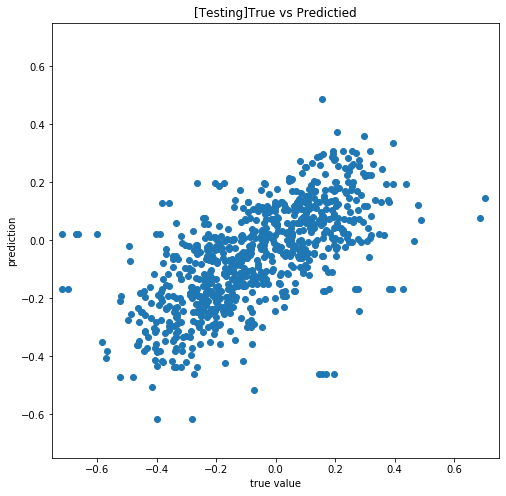

In [58]:
data_5 = full_data[full_data['Site'] == 5]
data_5 = data_5.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)

data_5_X = data_5.drop(['Response'], axis=1)
data_5_Y = data_5['Response']

train_x, test_x, train_y, test_y = train_test_split(data_5_X, data_5_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

model = sm.OLS(train_y, train_x_sc)
model_trained = model.fit()

y_pred_tr = model_trained.predict(train_x_sc)
y_pred_ts = model_trained.predict(test_x_sc)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts)))

print('Training MAE in Linear: {:.3f}' .format(mean_absolute_error(train_y, y_pred_tr)))
print('Testing MAE in Linear: {:.3f}' .format(mean_absolute_error(test_y, y_pred_ts)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts)))

plt.figure(figsize=(8,8))
plt.title('[Testing]True vs Predictied')
plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts)

## Site=6일 때 결과 도출

Training MSE in Linear: 0.041
Testing MSE in Linear: 0.053
Training MAE in Linear: 0.148
Testing MAE in Linear: 0.165
Training R2 in Linear: 0.409
Testing R2 in Linear: 0.304


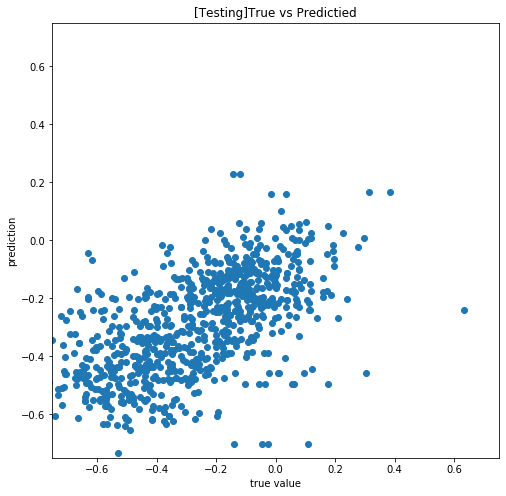

In [59]:
data_6 = full_data[full_data['Site'] == 6]
data_6 = data_6.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)

data_6_X = data_6.drop(['Response'], axis=1)
data_6_Y = data_6['Response']

train_x, test_x, train_y, test_y = train_test_split(data_6_X, data_6_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

model = sm.OLS(train_y, train_x_sc)
model_trained = model.fit()

y_pred_tr = model_trained.predict(train_x_sc)
y_pred_ts = model_trained.predict(test_x_sc)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts)))

print('Training MAE in Linear: {:.3f}' .format(mean_absolute_error(train_y, y_pred_tr)))
print('Testing MAE in Linear: {:.3f}' .format(mean_absolute_error(test_y, y_pred_ts)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts)))

plt.figure(figsize=(8,8))
plt.title('[Testing]True vs Predictied')
plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts)

## Site=7일 때 결과 도출

Training MSE in Linear: 0.027
Testing MSE in Linear: 0.031
Training MAE in Linear: 0.115
Testing MAE in Linear: 0.120
Training R2 in Linear: 0.473
Testing R2 in Linear: 0.379


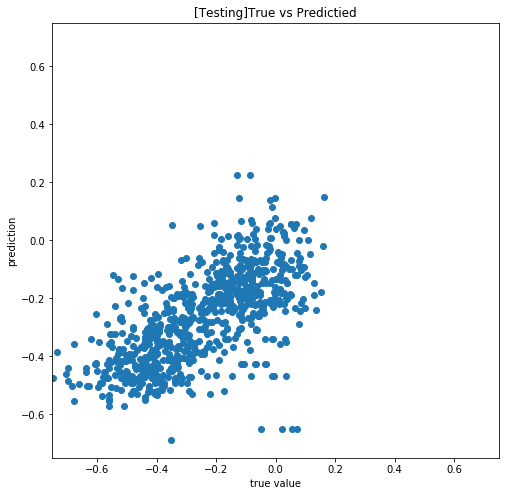

In [60]:
data_7 = full_data[full_data['Site'] == 7]
data_7 = data_7.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)

data_7_X = data_7.drop(['Response'], axis=1)
data_7_Y = data_7['Response']

train_x, test_x, train_y, test_y = train_test_split(data_7_X, data_7_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

model = sm.OLS(train_y, train_x_sc)
model_trained = model.fit()

y_pred_tr = model_trained.predict(train_x_sc)
y_pred_ts = model_trained.predict(test_x_sc)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts)))

print('Training MAE in Linear: {:.3f}' .format(mean_absolute_error(train_y, y_pred_tr)))
print('Testing MAE in Linear: {:.3f}' .format(mean_absolute_error(test_y, y_pred_ts)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts)))

plt.figure(figsize=(8,8))
plt.title('[Testing]True vs Predictied')
plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts)

## Site=8일 때 결과 도출

Training MSE in Linear: 0.038
Testing MSE in Linear: 0.041
Training MAE in Linear: 0.142
Testing MAE in Linear: 0.150
Training R2 in Linear: 0.444
Testing R2 in Linear: 0.340


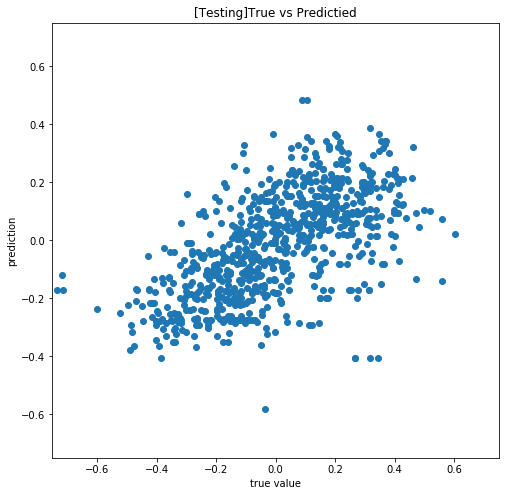

In [61]:
data_8 = full_data[full_data['Site'] == 8]
data_8 = data_8.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)

data_8_X = data_8.drop(['Response'], axis=1)
data_8_Y = data_8['Response']

train_x, test_x, train_y, test_y = train_test_split(data_8_X, data_8_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

model = sm.OLS(train_y, train_x_sc)
model_trained = model.fit()

y_pred_tr = model_trained.predict(train_x_sc)
y_pred_ts = model_trained.predict(test_x_sc)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts)))

print('Training MAE in Linear: {:.3f}' .format(mean_absolute_error(train_y, y_pred_tr)))
print('Testing MAE in Linear: {:.3f}' .format(mean_absolute_error(test_y, y_pred_ts)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts)))

plt.figure(figsize=(8,8))
plt.title('[Testing]True vs Predictied')
plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts)

## Site=9일 때 결과 도출

Training MSE in Linear: 0.033
Testing MSE in Linear: 0.035
Training MAE in Linear: 0.128
Testing MAE in Linear: 0.133
Training R2 in Linear: 0.490
Testing R2 in Linear: 0.436


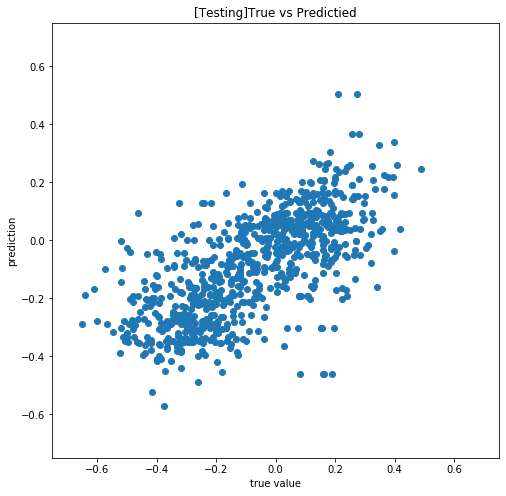

In [62]:
data_9 = full_data[full_data['Site'] == 9]
data_9 = data_9.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)

data_9_X = data_9.drop(['Response'], axis=1)
data_9_Y = data_9['Response']

train_x, test_x, train_y, test_y = train_test_split(data_9_X, data_9_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

model = sm.OLS(train_y, train_x_sc)
model_trained = model.fit()

y_pred_tr = model_trained.predict(train_x_sc)
y_pred_ts = model_trained.predict(test_x_sc)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts)))

print('Training MAE in Linear: {:.3f}' .format(mean_absolute_error(train_y, y_pred_tr)))
print('Testing MAE in Linear: {:.3f}' .format(mean_absolute_error(test_y, y_pred_ts)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts)))

plt.figure(figsize=(8,8))
plt.title('[Testing]True vs Predictied')
plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts)

## Site=10일 때 결과 도출

Training MSE in Linear: 0.134
Testing MSE in Linear: 0.152
Training MAE in Linear: 0.172
Testing MAE in Linear: 0.180
Training R2 in Linear: 0.177
Testing R2 in Linear: 0.115


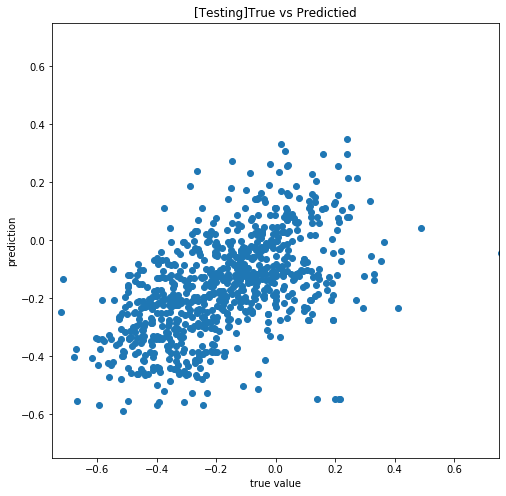

In [63]:
data_10 = full_data[full_data['Site'] == 10]
data_10 = data_10.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)

data_10_X = data_10.drop(['Response'], axis=1)
data_10_Y = data_10['Response']

train_x, test_x, train_y, test_y = train_test_split(data_10_X, data_10_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

model = sm.OLS(train_y, train_x_sc)
model_trained = model.fit()

y_pred_tr = model_trained.predict(train_x_sc)
y_pred_ts = model_trained.predict(test_x_sc)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts)))

print('Training MAE in Linear: {:.3f}' .format(mean_absolute_error(train_y, y_pred_tr)))
print('Testing MAE in Linear: {:.3f}' .format(mean_absolute_error(test_y, y_pred_ts)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts)))

plt.figure(figsize=(8,8))
plt.title('[Testing]True vs Predictied')
plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts)

## Site=11일 때 결과 도출

Training MSE in Linear: 3.774
Testing MSE in Linear: 3.589
Training MAE in Linear: 1.298
Testing MAE in Linear: 1.306
Training R2 in Linear: 0.233
Testing R2 in Linear: 0.154


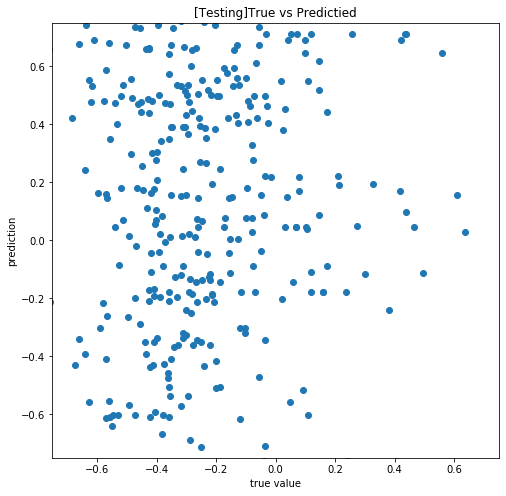

In [64]:
data_11 = full_data[full_data['Site'] == 11]
data_11 = data_11.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)

data_11_X = data_11.drop(['Response'], axis=1)
data_11_Y = data_11['Response']

train_x, test_x, train_y, test_y = train_test_split(data_11_X, data_11_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

model = sm.OLS(train_y, train_x_sc)
model_trained = model.fit()

y_pred_tr = model_trained.predict(train_x_sc)
y_pred_ts = model_trained.predict(test_x_sc)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts)))

print('Training MAE in Linear: {:.3f}' .format(mean_absolute_error(train_y, y_pred_tr)))
print('Testing MAE in Linear: {:.3f}' .format(mean_absolute_error(test_y, y_pred_ts)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts)))

plt.figure(figsize=(8,8))
plt.title('[Testing]True vs Predictied')
plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts)

## Site=12일 때 결과 도출

Training MSE in Linear: 1.149
Testing MSE in Linear: 1.196
Training MAE in Linear: 0.578
Testing MAE in Linear: 0.568
Training R2 in Linear: 0.174
Testing R2 in Linear: 0.081


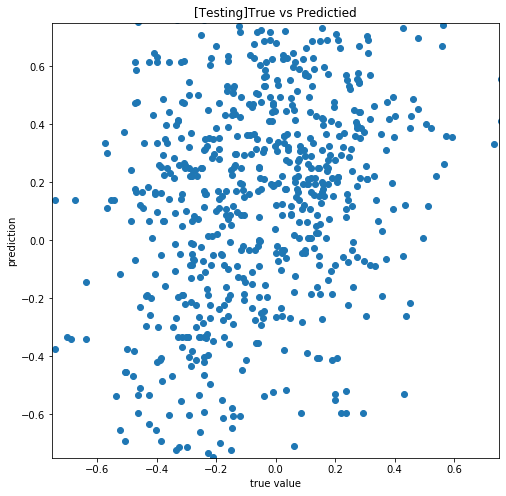

In [65]:
data_12 = full_data[full_data['Site'] == 12]
data_12 = data_12.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)

data_12_X = data_12.drop(['Response'], axis=1)
data_12_Y = data_12['Response']

train_x, test_x, train_y, test_y = train_test_split(data_12_X, data_12_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

model = sm.OLS(train_y, train_x_sc)
model_trained = model.fit()

y_pred_tr = model_trained.predict(train_x_sc)
y_pred_ts = model_trained.predict(test_x_sc)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts)))

print('Training MAE in Linear: {:.3f}' .format(mean_absolute_error(train_y, y_pred_tr)))
print('Testing MAE in Linear: {:.3f}' .format(mean_absolute_error(test_y, y_pred_ts)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts)))

plt.figure(figsize=(8,8))
plt.title('[Testing]True vs Predictied')
plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts)

## Site=13일 때 결과 도출

Training MSE in Linear: 0.035
Testing MSE in Linear: 0.035
Training MAE in Linear: 0.126
Testing MAE in Linear: 0.127
Training R2 in Linear: 0.416
Testing R2 in Linear: 0.379


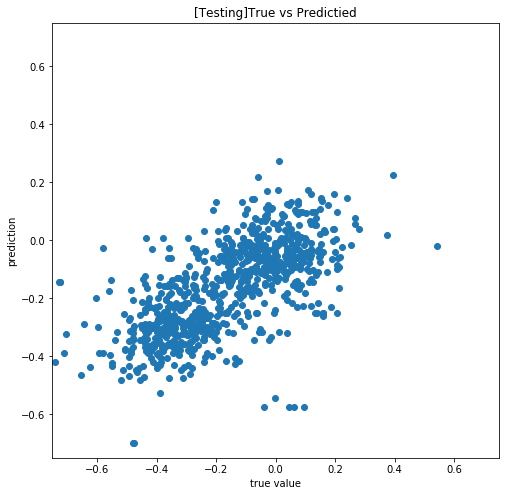

In [66]:
data_13 = full_data[full_data['Site'] == 13]
data_13 = data_13.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)

data_13_X = data_13.drop(['Response'], axis=1)
data_13_Y = data_13['Response']

train_x, test_x, train_y, test_y = train_test_split(data_13_X, data_13_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

model = sm.OLS(train_y, train_x_sc)
model_trained = model.fit()

y_pred_tr = model_trained.predict(train_x_sc)
y_pred_ts = model_trained.predict(test_x_sc)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts)))

print('Training MAE in Linear: {:.3f}' .format(mean_absolute_error(train_y, y_pred_tr)))
print('Testing MAE in Linear: {:.3f}' .format(mean_absolute_error(test_y, y_pred_ts)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts)))

plt.figure(figsize=(8,8))
plt.title('[Testing]True vs Predictied')
plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts)